some imports

In [26]:
import xgboost as xgb

from src.models.xgboost.train_model import get_model_class
from src.utils import read_data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

loading trained model

In [9]:
model: xgb.XGBRegressor = get_model_class()()
model.load_model('../models/xgboost.json')

loading validation data

In [10]:
X_val, y_val = read_data('../data/processed/data_val.csv')

making predictions

In [11]:
preds = model.predict(X_val)

plotting percent error

<AxesSubplot:xlabel='Y'>

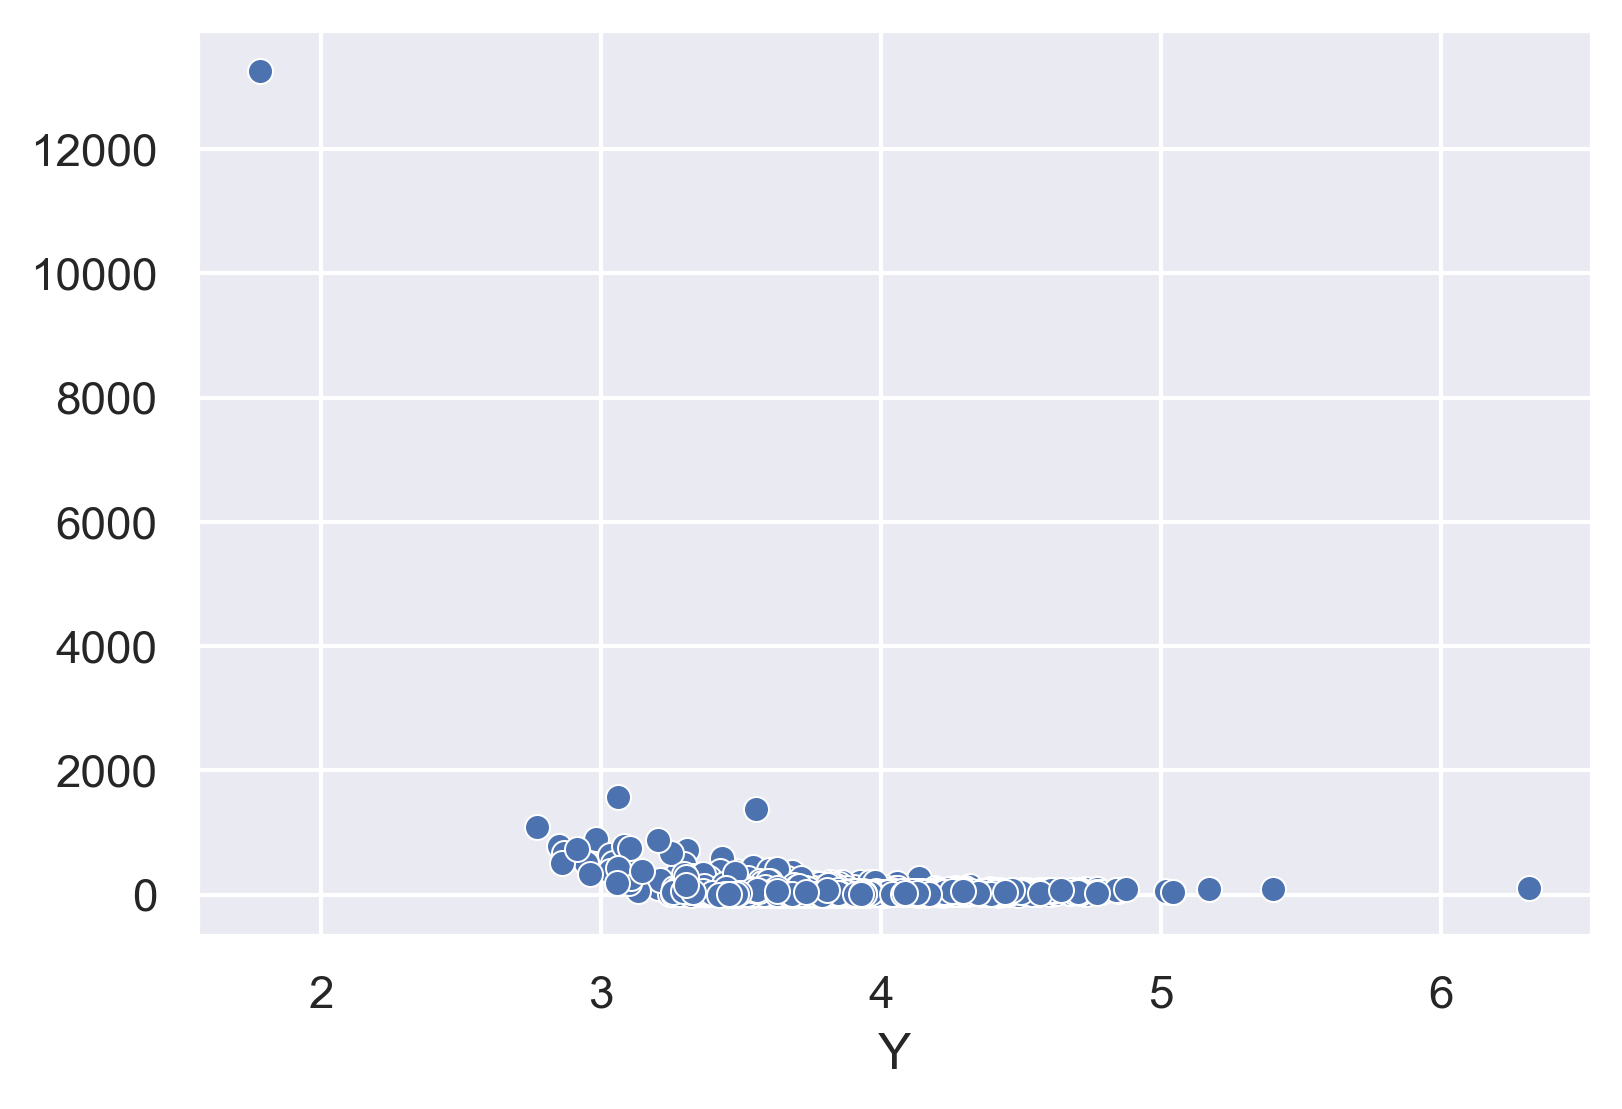

In [29]:
plt.figure(dpi=300)
sns.scatterplot(x=np.log10(y_val), y=[abs((pred - true) / true) * 100 for pred, true in zip(preds, y_val)])

we see that relative percent error is high among the low income clients. the most likely explanation is that the model by optimizing mean squared error focus on high income clients because that is the fastest way to lower the metric.

one solution is to make three models. one would be a classifier that predict whether client is high or low income, and next two are regression models. one for low income client and the other one for high income clients.